### Model 
<img src="./autoencoder.png">

### unpooling and convolution 
<img src="./unpooling.png">

In [2]:
from tensorflow.python.keras.datasets import mnist
import numpy as np

# preprocessing
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

/usr/local/envs/py2env/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# modeling
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense, Dropout, Flatten 
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.python import keras 
model = Sequential()
# encoding
model.add(Conv2D(16, kernel_size=(3, 3), padding ='same' ,activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=(3, 3), padding ='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# decoding
model.add(Conv2D(8, kernel_size=(3, 3),padding ='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(16, kernel_size=(3, 3), padding ='same',activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1, kernel_size=(3, 3), padding ='same',activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam()
             )

In [4]:
# fitting
model.fit(X_train, X_train,
          epochs=8,
          batch_size=128,
          shuffle=True,
          validation_data=(X_test, X_test)
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 126s 2ms/step - loss: 0.1608 - val_loss: 0.0895
Epoch 2/8
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0849 - val_loss: 0.0807
Epoch 3/8
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0801 - val_loss: 0.0780
Epoch 4/8
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0779 - val_loss: 0.0764
Epoch 5/8
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0764 - val_loss: 0.0750
Epoch 6/8
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0753 - val_loss: 0.0741
Epoch 7/8
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0744 - val_loss: 0.0734
Epoch 8/8
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0738 - val_loss: 0.0729


In [14]:
# predict 
predicted = model.predict(X_test[:10])

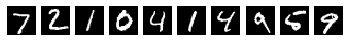

In [28]:
n = 10 
for i in range(n):
  # display original
  ax = plt.subplot(4, n, i+1)
  plt.imshow(np.squeeze(X_test[i]), interpolation='None')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.gray()

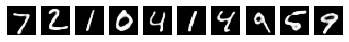

In [29]:
for i in range(n):
  # display original
  ax = plt.subplot(4, n, i+1)
  plt.imshow(np.squeeze(predicted[i]), interpolation='None')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.gray()
plt.show()